In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Youtube01-Psy.csv")

In [3]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [4]:
df.isnull().sum()

COMMENT_ID    0
AUTHOR        0
DATE          0
CONTENT       0
CLASS         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CONTENT     350 non-null    object
 4   CLASS       350 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [6]:
df["CONTENT"]= df["CONTENT"].str.lower() #kucuk harfe donusturduk
df["CONTENT"]= df["CONTENT"].str.replace('[^\w\s]','')#noktalama işaretlerini kaldır
df["CONTENT"]= df["CONTENT"].str.replace('\n','') # slash n leri bul kaldır boşlukları bul kaldır
df["CONTENT"]= df["CONTENT"].str.replace('\d+','') #rakamları bul kaldır
df["CONTENT"]= df["CONTENT"].str.replace('\r','') #satırbaslarını kaldır

/var/folders/j8/f23r7m5n62l6j13r9vn5pvxc0000gn/T/ipykernel_90124/538489419.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["CONTENT"]= df["CONTENT"].str.replace('[^\w\s]','')#noktalama işaretlerini kaldır
/var/folders/j8/f23r7m5n62l6j13r9vn5pvxc0000gn/T/ipykernel_90124/538489419.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["CONTENT"]= df["CONTENT"].str.replace('\d+','') #rakamları bul kaldır


In [7]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,huh anyway check out this youtube channel koby...,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test i have to say murdevcom,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy _,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watchvvtarggvgtwq check this out,1


In [8]:
import seaborn as sns

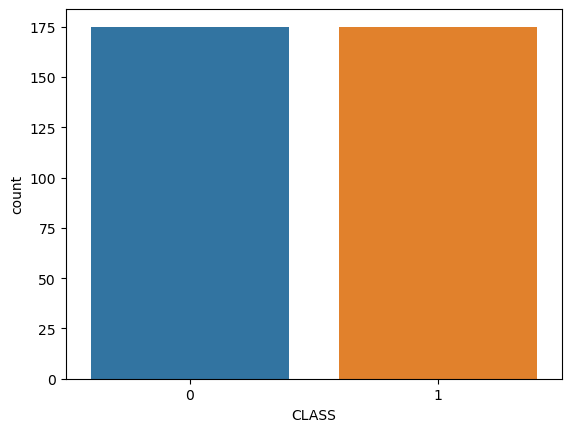

In [9]:
sns.countplot(x=df["CLASS"]);

# SENTIMENT ANALYSIS

In [10]:
import numpy as np

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split



In [12]:
df = df[["CONTENT", "CLASS"]]
x = np.array(df["CONTENT"])
y = np.array(df["CLASS"])

cv = CountVectorizer()
x = cv.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)



In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr= PorterStemmer()

In [16]:
nb=MultinomialNB()

In [17]:
model=nb.fit(x_train,y_train)

In [18]:
tahmin=model.predict(x_test)

In [19]:
accuracy_score(tahmin,y_test)

0.8571428571428571

In [20]:
tahmin

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0])

In [21]:
from sklearn.naive_bayes import BernoulliNB

In [22]:
b=BernoulliNB()

In [23]:
model=b.fit(x_train, y_train)

In [24]:
tahmin=model.predict(x_test)

In [25]:
accuracy_score(tahmin, y_test)

0.8142857142857143

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
d=DecisionTreeClassifier()

In [28]:
model=d.fit(x_train, y_train)

In [29]:
tahmin=model.predict(x_test)

In [30]:
accuracy_score(tahmin, y_test)

0.7714285714285715

In [31]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

In [32]:
k.fit(x,y)

KNeighborsClassifier()

In [33]:
tahmin3=k.predict(x)

In [34]:
accuracy_score(tahmin3,y)

0.8828571428571429

In [35]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [36]:
l.fit(x,y)


LogisticRegression()

In [37]:
tahmin4=l.predict(x)

In [38]:
accuracy_score(tahmin4,y)

0.9971428571428571

In [39]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

In [40]:
r.fit(x,y)

RandomForestClassifier()

In [41]:
tahmin6=r.predict(x)

In [42]:
accuracy_score(tahmin6,y)

1.0

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [44]:
gb.fit(x,y)

GradientBoostingClassifier()

In [45]:
tahmin7=gb.predict(x)

In [46]:
accuracy_score(tahmin7,y)

0.9771428571428571

In [47]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [48]:
from wordcloud import WordCloud



In [49]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS  #gereksiz kelimeleri kaldır
from PIL import Image #resim okutmak için
import numpy as np

In [50]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask=mask)
    wc.generate(" ".join(data)) # join diyerek bütün sütunlardaki satırları birleştiriyor
    plt.imshow(wc)
    plt.axis("off")

In [51]:
" ".join(df["CONTENT"]) #butun satırları bırlestırdı tek bır text yaptı

'huh anyway check out this youtube channel kobyoshi hey guys check out my new channel and our first vid this is us the  monkeys im the monkey in the white shirtplease leave a like comment  and please subscribe just for test i have to say murdevcom me shaking my sexy ass on my channel enjoy _  watchvvtarggvgtwq   check this out  hey check out my new website this site is about kids stuff kidsmediausa   com subscribe to my channel  i turned it on mute as soon is i came on i just wanted to check the  views you should check my channel for funny videos and u shouldd check my channel and tell me what i should do next hey subscribe to me  once you have started reading do not stop if you do not subscribe to me  within one day you and youre entire family will die so if you want to stay  alive subscribe right now httpstwittercomgbphotographygb subscribe like comment please like d httpspremiumeasypromosappcomvoteme hello do you like gaming art videos scientific experiments tutorials  lyrics videos

In [52]:
import matplotlib.pyplot as plt

In [53]:

text=df[df["CLASS"]==1]["CONTENT"]

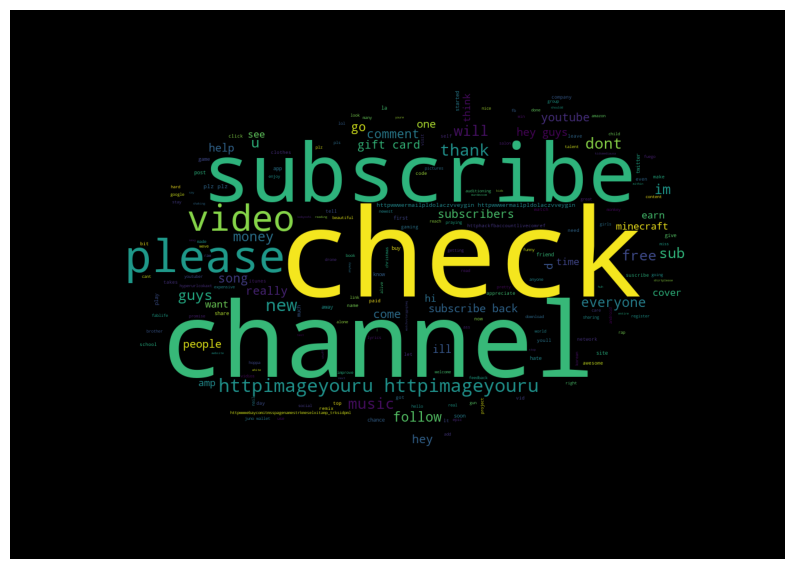

In [54]:
wc(text,"black")